In [1]:
# dependency list
!pip install tradingview_ta
!pip install stockstats
!pip install yahoofinancials
!pip install yfinance
!pip install pandas_ta
!pip install finta
!pip install plotly
!pip install mplfinance
!pip install scikit-learn
!pip install lightgbm catboost

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [7]:
# install TA-lib dependencies
"""
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!sudo make install
"""
!pip install Ta-Lib

Defaulting to user installation because normal site-packages is not writeable


## Data Acquisition and Preprocessing

In [45]:
import pandas as pd
import mplfinance as mpf
import yfinance as yf
import numpy as np
from datetime import date

In [101]:
# fetch and process data
# start = "2023-01-01"
# end = "2023-10-04"

start = '2021-10-01'
end = date.today().strftime('%Y-%m-%d')
tickers_list_symbol = ['AEFES.IS', 'AGHOL.IS', 'AKBNK.IS', 'AKFGY.IS', 'AKSA.IS', 'AKSEN.IS', 'ALARK.IS', 'ALBRK.IS', 'ALGYO.IS', 'ALKIM.IS', 'ARCLK.IS', 'BAGFS.IS', 'BERA.IS', 'BIMAS.IS', 'BRYAT.IS', 'BUCIM.IS', 'CCOLA.IS', 'CEMTS.IS', 'CIMSA.IS', 'DEVA.IS', 'DOAS.IS', 'DOHOL.IS', 'ECILC.IS', 'EGEEN.IS', 'EKGYO.IS', 'ENJSA.IS', 'ENKAI.IS', 'ERBOS.IS', 'EREGL.IS', 'FROTO.IS', 'GARAN.IS', 'GENIL.IS', 'GESAN.IS', 'GLYHO.IS', 'GOZDE.IS', 'GSDHO.IS', 'GUBRF.IS', 'GWIND.IS', 'HALKB.IS', 'ISCTR.IS', 'ISDMR.IS', 'ISFIN.IS', 'ISGYO.IS', 'ISMEN.IS', 'JANTS.IS', 'KARSN.IS', 'KARTN.IS', 'KCHOL.IS', 'KONTR.IS', 'KORDS.IS', 'KOZAA.IS', 'KOZAL.IS', 'KRDMD.IS', 'LOGO.IS', 'MAVI.IS', 'MGROS.IS', 'NTHOL.IS', 'NUGYO.IS', 'ODAS.IS', 'OTKAR.IS', 'OYAKC.IS', 'PETKM.IS', 'PGSUS.IS', 'PRKAB.IS', 'PSGYO.IS', 'QUAGR.IS', 'SAHOL.IS', 'SASA.IS', 'SKBNK.IS', 'SMRTG.IS', 'SNGYO.IS', 'SOKM.IS', 'TAVHL.IS', 'TCELL.IS', 'THYAO.IS', 'TKFEN.IS', 'TMSN.IS', 'TOASO.IS', 'TRGYO.IS', 'TSKB.IS', 'TSPOR.IS', 'TTKOM.IS', 'TTRAK.IS', 'TUKAS.IS', 'TUPRS.IS', 'TURSG.IS', 'ULKER.IS', 'VAKBN.IS', 'VESBE.IS', 'VESTL.IS', 'YATAS.IS', 'YKBNK.IS', 'YYLGD.IS']
df = yf.download(tickers_list_symbol, start, end)
df = df.swaplevel(axis = "columns").sort_index(axis = "columns")  ## swap outer and inner index

[*********************100%%**********************]  93 of 93 completed


7 Failed downloads:
['GARAN.IS', 'YKBNK.IS', 'TTKOM.IS', 'FROTO.IS', 'LOGO.IS', 'KARSN.IS', 'AKSEN.IS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-10-01 -> 2023-12-24)')


In [73]:
# convert column namesto snake_case
new_columns = [(level[0], level[1].lower().replace(' ', '_')) for level in df.columns]
df.columns = pd.MultiIndex.from_tuples(new_columns)
df['AEFES.IS'].we()

,adj_close,close,high,low,open,volume
Date,,,,,,
2021-10-01 00:00:00,19.378561,21.240000,21.360001,21.020000,21.299999,1059045
2021-10-04 00:00:00,19.798248,21.700001,22.000000,21.240000,21.240000,1449139
2021-10-05 00:00:00,19.615776,21.500000,21.940001,21.280001,21.760000,1849854
2021-10-06 00:00:00,19.269079,21.120001,21.520000,21.100000,21.379999,1098225
2021-10-07 00:00:00,19.214336,21.059999,21.340000,20.959999,21.200001,1010690


[*********************103%%***********************]  96 of 93 completed

In [74]:
# handle NaN values
# drop the ticker if NaN exists
for ticker in tickers_list_symbol:
    nan_amount = df[ticker].isna().sum().sum()
    if nan_amount != 0:
        print("NaN containing tickers are deleted: {}, {}" .format(ticker, nan_amount))
        df.drop(ticker, axis=1, level=0, inplace=True)
tickers_list_symbol = df.columns.get_level_values(0).unique() # upate ticker list
df.head()

NaN containing tickers are deleted: GENIL.IS, 2256
NaN containing tickers are deleted: GWIND.IS, 6
NaN containing tickers are deleted: PETKM.IS, 3366
NaN containing tickers are deleted: PSGYO.IS, 2982
NaN containing tickers are deleted: SMRTG.IS, 738
NaN containing tickers are deleted: TKFEN.IS, 3366
NaN containing tickers are deleted: TRGYO.IS, 3366
NaN containing tickers are deleted: ULKER.IS, 3366
NaN containing tickers are deleted: YYLGD.IS, 960


AEFES.IS                                              \
                     adj_close      close       high        low       open   
Date                                                                         
2021-10-01 00:00:00  19.378561  21.240000  21.360001  21.020000  21.299999   
2021-10-04 00:00:00  19.798248  21.700001  22.000000  21.240000  21.240000   
2021-10-05 00:00:00  19.615776  21.500000  21.940001  21.280001  21.760000   
2021-10-06 00:00:00  19.269079  21.120001  21.520000  21.100000  21.379999   
2021-10-07 00:00:00  19.214336  21.059999  21.340000  20.959999  21.200001   

                               AGHOL.IS                                   ...  \
                      volume  adj_close      close       high        low  ...   
Date                                                                      ...   
2021-10-01 00:00:00  1059045  23.227133  23.600000  23.879999  22.820000  ...   
2021-10-04 00:00:00  1449139  23.286184  23.660000  24.280001  23.540001  ...   
2021-10-05 00:00:00  1849854  23.266499  23.639999  23.920000  23.480000  ...   
2021-10-06 00:00:00  1098225  23.089344  23.459999  24.000000  23.219999  ...   
2021-10-07 00:00:00  1010690  23.404287  23.780001  24.040001  23.639999  ...   

                    YATAS.IS                         YKBNK.IS              \
                        high    low   open   volume adj_close close  high   
Date                                                                        
2021-10-01 00:00:00    14.12  13.86  14.05   847307  2.140963  2.39  2.40   
2021-10-04 00:00:00    14.20  13.75  14.01  1475991  2.132005  2.38  2.41   
2021-10-05 00:00:00    13.85  13.60  13.80   732749  2.123047  2.37  2.39   
2021-10-06 00:00:00    13.50  13.02  13.48   713488  2.114089  2.36  2.38   
2021-10-07 00:00:00    13.45  13.28  13.36   453387  2.140963  2.39  2.40   

                                            
                      low  open     volume  
Date                                        
2021-10-01 00:00:00  2.36  2.39  268085015  
2021-10-04 00:00:00  2.37  2.39  211864501  
2021-10-05 00:00:00  2.35  2.38  134268498  
2021-10-06 00:00:00  2.34  2.37  230951480  
2021-10-07 00:00:00  2.37  2.39  108638291  

[5 rows x 504 columns]

[**********************105%%***********************]  98 of 93 completed

## Plot Candlesticks

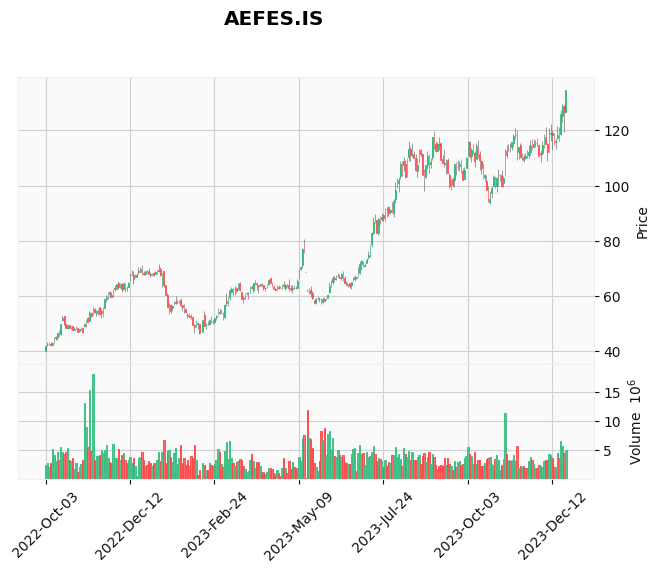

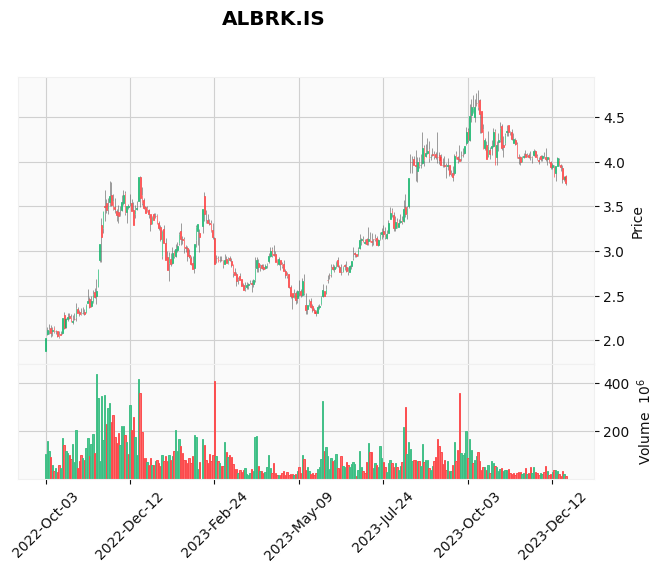

KeyboardInterrupt: 

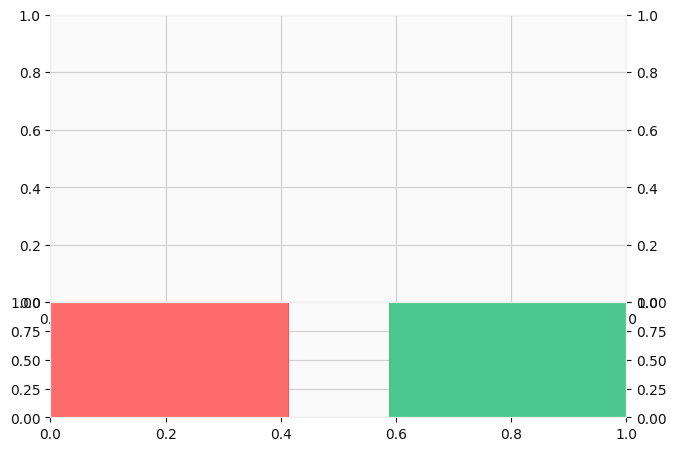

In [50]:
# Plot candlestick chart
import mplfinance as mpf
for ticker in tickers_list_symbol[:5]:
    mpf.plot(df[ticker], 
             type='candle', 
             style='yahoo', 
             volume=True, 
             title= ticker, 
             ylabel='Price')

## Feature Engineering

In [75]:
"""
create new column for candle stick color  
green represented with 1
red represented with -1
"""
for ticker in tickers_list_symbol: 
    df[(ticker, 'candlestick_color')] = df[(ticker, 'close')] - df[(ticker, 'open')]
    df[(ticker, 'candlestick_color')] = df[(ticker, 'candlestick_color')].apply(lambda x: 1 if x > 0 else -1)

df

AEFES.IS                                                  \
             adj_close       close        high         low        open   
Date                                                                     
2021-10-01   19.378561   21.240000   21.360001   21.020000   21.299999   
2021-10-04   19.798248   21.700001   22.000000   21.240000   21.240000   
2021-10-05   19.615776   21.500000   21.940001   21.280001   21.760000   
2021-10-06   19.269079   21.120001   21.520000   21.100000   21.379999   
2021-10-07   19.214336   21.059999   21.340000   20.959999   21.200001   
...                ...         ...         ...         ...         ...   
2023-12-18  116.300003  116.300003  121.400002  116.099998  118.199997   
2023-12-19  125.900002  125.900002  127.300003  118.300003  118.800003   
2023-12-20  128.800003  128.800003  129.500000  122.900002  125.099998   
2023-12-21  126.800003  126.800003  129.300003  119.300003  129.000000   
2023-12-22  134.500000  134.500000  134.800003  126.800003  126.800003   

                       AGHOL.IS                                      ...  \
             volume   adj_close       close        high         low  ...   
Date                                                                 ...   
2021-10-01  1059045   23.227133   23.600000   23.879999   22.820000  ...   
2021-10-04  1449139   23.286184   23.660000   24.280001   23.540001  ...   
2021-10-05  1849854   23.266499   23.639999   23.920000   23.480000  ...   
2021-10-06  1098225   23.089344   23.459999   24.000000   23.219999  ...   
2021-10-07  1010690   23.404287   23.780001   24.040001   23.639999  ...   
...             ...         ...         ...         ...         ...  ...   
2023-12-18  3664534  191.100006  191.100006  199.600006  190.500000  ...   
2023-12-19  6606569  196.500000  196.500000  200.199997  187.199997  ...   
2023-12-20  5675692  197.000000  197.000000  198.000000  191.899994  ...   
2023-12-21  4563640  195.800003  195.800003  197.800003  189.500000  ...   
2023-12-22  4968193  197.699997  197.699997  202.500000  194.000000  ...   

                    TTKOM.IS          TTRAK.IS          TUKAS.IS  \
           candlestick_color candlestick_color candlestick_color   
Date                                                               
2021-10-01                 1                 1                 1   
2021-10-04                 1                -1                -1   
2021-10-05                 1                -1                -1   
2021-10-06                -1                -1                 1   
2021-10-07                -1                -1                -1   
...                      ...               ...               ...   
2023-12-18                -1                -1                -1   
2023-12-19                 1                -1                -1   
2023-12-20                 1                -1                -1   
2023-12-21                 1                 1                 1   
2023-12-22                -1                -1                -1   

                    TUPRS.IS          TURSG.IS          VAKBN.IS  \
           candlestick_color candlestick_color candlestick_color   
Date                                                               
2021-10-01                -1                 1                 1   
2021-10-04                 1                 1                -1   
2021-10-05                 1                -1                -1   
2021-10-06                -1                -1                -1   
2021-10-07                 1                 1                -1   
...                      ...               ...               ...   
2023-12-18                -1                -1                 1   
2023-12-19                 1                 1                -1   
2023-12-20                 1                -1                 1   
2023-12-21                 1                -1                -1   
2023-12-22                -1                -1                -1   

      

[***************************124%%****************************]  115 of 93 completed

## Add Indicators

In [100]:
#print(df)
#print(talib.SMA(df[(ticker, 'close')], timeperiod=5))
for ticker in tickers_list_symbol:
    df[(ticker, 'sma_5')] = talib.SMA(df[(ticker, 'close')], timeperiod=5)
    df.dropna(inplace=True)
    print(df[ticker])

import talib


Empty DataFrame
Columns: [adj_close, close, high, low, open, volume, candlestick_color, sma_5]
Index: []
Empty DataFrame
Columns: [adj_close, close, high, low, open, volume, candlestick_color, sma_5]
Index: []
Empty DataFrame
Columns: [adj_close, close, high, low, open, volume, candlestick_color, sma_5]
Index: []
Empty DataFrame
Columns: [adj_close, close, high, low, open, volume, candlestick_color, sma_5]
Index: []
Empty DataFrame
Columns: [adj_close, close, high, low, open, volume, candlestick_color, sma_5]
Index: []
Empty DataFrame
Columns: [adj_close, close, high, low, open, volume, candlestick_color, sma_5]
Index: []
Empty DataFrame
Columns: [adj_close, close, high, low, open, volume, candlestick_color, sma_5]
Index: []
Empty DataFrame
Columns: [adj_close, close, high, low, open, volume, candlestick_color, sma_5]
Index: []
Empty DataFrame
Columns: [adj_close, close, high, low, open, volume, candlestick_color, sma_5]
Index: []
Empty DataFrame
Columns: [adj_close, close, high, low, 

In [21]:
class PerformanceMetrics:
    def __init__(self, classifier, model, stock, accuracy, precision, recall, f1):
        self.stock = stock
        self.model = model
        self.accuracy = round(accuracy, 3)
        self.precision = round(precision, 3)
        self.recall = round(recall, 3)
        self.f1 = round(f1, 3)
        self.classifer = classifier
    
    def __str__(self):
        return f"{self.stock}, {self.model}, {self.accuracy}, {self.precision}, {self.recall}, {self.f1}"
    
    def __repr__(self):
        return f"{self.stock}, {self.model}, {self.accuracy}, {self.precision}, {self.recall}, {self.f1}"

## Machine Learning Models

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# Assuming 'df' is your DataFrame and it's already loaded with the 'candlestick_color' column
def train_random_forest(ticker):
    ticker_df = df[ticker].copy()

    features = ticker_df[['adj_close', 'close', 'high', 'low', 'open', 'volume']]
    target = ticker_df['candlestick_color']
    
    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    # Initialize the RandomForestClassifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    
    # Fit the model to the training data
    rf_classifier.fit(X_train, y_train)

    # Predict the target on the test set
    y_pred = rf_classifier.predict(X_test)
    
    # Evaluate the model's performance
    report = classification_report(y_test, y_pred, output_dict=True)
    metrics = PerformanceMetrics(
        rf_classifier,
        "random forest",
        ticker,
        accuracy_score(y_test, y_pred),
        report['weighted avg']['precision'],
        report['weighted avg']['recall'],
        report['weighted avg']['f1-score']
    )

    return metrics


def train_lightgbm(ticker):
    ticker_df = df[ticker].copy()
    
    features = ticker_df[['adj_close', 'close', 'high', 'low', 'open', 'volume']]
    target = ticker_df['candlestick_color']
    
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    lgbm_classifier = LGBMClassifier(verbose=-1, random_state=42, force_col_wise=True)
    lgbm_classifier.fit(X_train, y_train)

    y_pred = lgbm_classifier.predict(X_test)
    
    # Evaluate the model's performance
    report = classification_report(y_test, y_pred, output_dict=True)
    metrics = PerformanceMetrics(
        lgbm_classifier,
        "lightgbm",
        ticker,
        accuracy_score(y_test, y_pred),
        report['weighted avg']['precision'],
        report['weighted avg']['recall'],
        report['weighted avg']['f1-score']
    )
    return metrics


def train_catboost(ticker):
    ticker_df = df[ticker].copy()

    features = ticker_df[['adj_close', 'close', 'high', 'low', 'open', 'volume']]
    target = ticker_df['candlestick_color']
    
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    catboost_classifier = CatBoostClassifier(random_state=42, verbose=0)
    catboost_classifier.fit(X_train, y_train)

    y_pred = catboost_classifier.predict(X_test)
    # Evaluate the model's performance
    report = classification_report(y_test, y_pred, output_dict=True)
    metrics = PerformanceMetrics(
        catboost_classifier,
        "catboost",
        ticker,
        accuracy_score(y_test, y_pred),
        report['weighted avg']['precision'],
        report['weighted avg']['recall'],
        report['weighted avg']['f1-score']
    )
    return metrics

In [44]:
# check accurracies
# Assuming tickers_list_symbol is a list of ticker symbols
metrics = []
for ticker in tickers_list_symbol:
    best_metric = max([train_random_forest(ticker), train_lightgbm(ticker), train_catboost(ticker)], key=lambda x: x.f1)
    print(best_metric)
    metrics.append(best_metric)

AEFES.IS, lightgbm, 0.705, 0.705, 0.705, 0.705
AGHOL.IS, lightgbm, 0.819, 0.82, 0.819, 0.818
AKBNK.IS, lightgbm, 0.711, 0.712, 0.711, 0.709
AKFGY.IS, lightgbm, 0.886, 0.886, 0.886, 0.886
AKSA.IS, lightgbm, 0.725, 0.729, 0.725, 0.725
AKSEN.IS, catboost, 0.718, 0.733, 0.718, 0.719
ALARK.IS, lightgbm, 0.738, 0.738, 0.738, 0.738
ALBRK.IS, lightgbm, 0.839, 0.84, 0.839, 0.839
ALGYO.IS, lightgbm, 0.725, 0.721, 0.725, 0.719
ALKIM.IS, lightgbm, 0.785, 0.789, 0.785, 0.787
ARCLK.IS, lightgbm, 0.772, 0.772, 0.772, 0.771
BAGFS.IS, lightgbm, 0.805, 0.806, 0.805, 0.804
BERA.IS, lightgbm, 0.872, 0.872, 0.872, 0.872
BIMAS.IS, lightgbm, 0.758, 0.758, 0.758, 0.758
BRYAT.IS, lightgbm, 0.785, 0.785, 0.785, 0.785
BUCIM.IS, lightgbm, 0.785, 0.804, 0.785, 0.779
CCOLA.IS, lightgbm, 0.725, 0.729, 0.725, 0.723
CEMTS.IS, lightgbm, 0.752, 0.751, 0.752, 0.751
CIMSA.IS, lightgbm, 0.745, 0.744, 0.745, 0.743
DEVA.IS, lightgbm, 0.832, 0.835, 0.832, 0.832
DOAS.IS, lightgbm, 0.738, 0.738, 0.738, 0.737
DOHOL.IS, lightgbm,

In [45]:
# write metrics
M_COLUMNS = "stock, model, accuracy, precision, recall, f1"
with open('metrics.csv', 'w') as file:
    file.write(M_COLUMNS)
    for metric in metrics:
        file.write(str(metric))

## Evaluate

In [46]:
# top 10 model and stock
top10 = sorted(metrics, key=lambda x: x.f1)[:10]
print(M_COLUMNS)
top10

stock, model, accuracy, precision, recall, f1


[YKBNK.IS, lightgbm, 0.685, 0.688, 0.685, 0.684,
 TUPRS.IS, random forest, 0.685, 0.687, 0.685, 0.686,
 GARAN.IS, lightgbm, 0.705, 0.703, 0.705, 0.704,
 AEFES.IS, lightgbm, 0.705, 0.705, 0.705, 0.705,
 MAVI.IS, lightgbm, 0.705, 0.705, 0.705, 0.705,
 PGSUS.IS, catboost, 0.711, 0.716, 0.711, 0.708,
 AKBNK.IS, lightgbm, 0.711, 0.712, 0.711, 0.709,
 KCHOL.IS, lightgbm, 0.718, 0.718, 0.718, 0.717,
 ISCTR.IS, lightgbm, 0.718, 0.724, 0.718, 0.718,
 AKSEN.IS, catboost, 0.718, 0.733, 0.718, 0.719]